# The Sock Missing Problem: 
## Number of Pairs as a Function of Number Stolen by the Sock Fairy

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def sampleRandoms(seed, totalNumber, numberMissing):
    random.seed(seed)
    socks=list(range(0, totalNumber))
    left=random.sample(socks, totalNumber-numberMissing)
    left.sort()
    pairsLeft=[i for i in left if i%2==0 and i+1 in left]
    return(len(pairsLeft))

def generateDF(numberOfRuns, totalNumber):
    dictionary={}
    for numberMissing in range(0, totalNumber):
        dictionary[numberMissing]=[sampleRandoms(seed, totalNumber, numberMissing) for seed in list(range(0,numberOfRuns))]
    df=pd.DataFrame.from_dict(dictionary, orient='index')
    return(df)

def putItTogether(numberOfRuns, totalNumber):
    df=generateDF(numberOfRuns, totalNumber)
    means=df.mean(axis=1)
    fig = plt.figure()
    ax = plt.axes()
    plt.title("Complete Pairs As a Function of Number of Missing Socks")
    plt.xlabel(f"Number of Missing Socks out of {totalNumber}")
    plt.ylabel("Number of Complete Pairs")
    ax.plot(means.index, means)
    return(means)

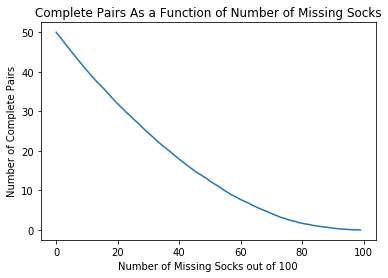

In [3]:
means=putItTogether(100, 100)

In [9]:
newDF=means.to_frame().reset_index()
newDF.columns=['Number of Missing Socks', 'Number of Complete Pairs']
newDF['Number of Paired Socks']=newDF['Number of Complete Pairs']*2
newDF['Number of Unpaired Socks']=100-newDF['Number of Missing Socks']-newDF['Number of Paired Socks']

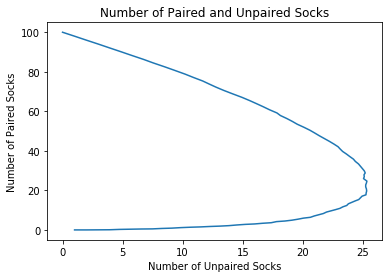

In [12]:
fig = plt.figure()
ax = plt.axes()
plt.title("Number of Paired and Unpaired Socks")
plt.xlabel('Number of Unpaired Socks')
plt.ylabel('Number of Paired Socks')
ax.plot(newDF['Number of Unpaired Socks'], newDF['Number of Paired Socks'])
